In [7]:
!curl https://afterschool.moe.gov.tw/public/file/opendata.csv -o 全國立案兒童課後照顧服務中心基本資料.csv

import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Microsoft JhengHei') # 讓 plt 可以顯示中文

df = pd.read_csv('全國立案兒童課後照顧服務中心基本資料.csv', encoding='utf-8') # 讀取資料集檔案
df.isnull().sum().sum() # 檢查空值數量

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 15  103k   15 16080    0     0  31518      0  0:00:03 --:--:--  0:00:03 31529
100  103k  100  103k    0     0   165k      0 --:--:-- --:--:-- --:--:--  165k


0

In [8]:
df

,縣市,名稱,電話,地址,立案時間
0,臺北市,臺北市私立高階兒童課後照顧服務中心,(02)2395-5709,臺北市中正區濟南路2段62巷10號1樓,102/08/12
1,臺北市,臺北市私立吉而斯兒童課後照顧服務中心,(02)2594-0930、2595-4411,臺北市大同區酒泉街135號2樓,101/12/13
2,臺北市,臺北市私立青青兒童課後照顧服務中心,(02)2553-9333,臺北市大同區民權西路160巷28號2樓,102/08/19
3,臺北市,臺北市私立阿凡橋兒童課後照顧服務中心,(02)2592-6840,臺北市大同區重慶北路3段257巷5號1、2樓,102/10/31
4,臺北市,臺北市私立海格斯兒童課後照顧服務中心,(02)2553-5198、2666-5573,臺北市大同區延平北路2段278號3樓之1,102/12/10
...,...,...,...,...,...
781,屏東縣,屏東縣私立佳園兒童課後照顧服務中心,(08)-,屏東縣屏東市崇蘭里廣東路1440號1-3樓,111/05/31
782,屏東縣,屏東縣私立銨芯兒童課後照顧服務中心,(08)707-6706,屏東縣萬丹鄉社中村社皮路3段276號1、2、3樓,107/08/02
783,屏東縣,私立世大兒童課後照顧服務中心,(08)833-6441,屏東縣東港鎮興東里新興三街62號1樓,108/02/14
784,屏東縣,私立加資兒童課後照顧服務中心,(08)835-5321,屏東縣新園鄉鹽埔村聖心路138號,102/10/11


# 1.本資料在105年以前收集了多少兒童課後照顧服務中心
(分成105年前後)

In [9]:
before_105 = 0
for index, row in df.iterrows():
    if int(row['立案時間'].split('/')[0]) < 105:
        before_105 += 1

print(f"在105年以前，共有{before_105}間兒童課後照顧服務中心")


在105年以前，共有590間兒童課後照顧服務中心


# 2. 本資料中總共兒童課後照顧服務中心有幾間?
(兒童課後照顧服務中心)

In [12]:
print(f"本資料中共有{len(df)}間兒童課後照顧服務中心")

本資料中共有786間兒童課後照顧服務中心


# 3. 本資料中哪個縣市最多兒童課後照顧服務中心?
(縣市)( 兒童課後照顧服務中心)

In [22]:
df.groupby('縣市', sort=False)['名稱'].count().reset_index(name ='數量').max()

縣市    高雄市
數量    251
dtype: object

# 4. 本資料中哪個縣市最少兒童課後照顧服務中心?
(縣市)( 兒童課後照顧服務中心)

In [23]:
df.groupby('縣市', sort=False)['名稱'].count().reset_index(name ='數量').min()

縣市    南投縣
數量      1
dtype: object

# 5.台北市和其他縣市的兒童課後照顧服務中心比例為何
(台北市課後照顧服務中心)(其他縣市課後照顧服務中心)

本資料中台北市和其他縣市的兒童課後照顧服務中心比例為134:652


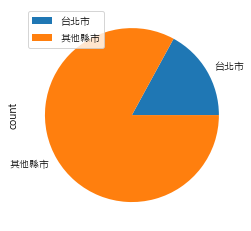

In [37]:
taipei = 0
others = 0
df1 = df.groupby('縣市', sort=False)['名稱'].count().reset_index(name ='數量')
for index, row in df1.iterrows():
    if row['縣市'] == '臺北市':
        taipei = row['數量']
    else:
        others += row['數量']
df2 = pd.DataFrame({'count': [taipei , others]}, index=['台北市', '其他縣市'])
df2.plot.pie(y='count')

print(f"本資料中台北市和其他縣市的兒童課後照顧服務中心比例為{taipei}:{others}")


# 6.北中南東的兒童課後照顧服務中心比例為何
(北部課後照顧服務中心)(中部課後照顧服務中心)(南部課後照顧服務中心)(東部課後照顧服務中心)

In [33]:
count_list = {'北部':0, '中部':0, '南部':0, '東部':0, '外島': 0}
city_to_area = {
    '臺北市':'北部', 
    '新北市':'北部', 
    '基隆市':'北部', 
    '新竹市':'北部', 
    '桃園市':'北部', 
    '新竹縣':'北部', 
    '宜蘭縣':'北部', 
    '臺中市':'中部', 
    '苗栗縣':'中部', 
    '彰化縣':'中部', 
    '南投縣':'中部', 
    '雲林縣':'中部', 
    '高雄市':'南部', 
    '臺南市':'南部', 
    '嘉義市':'南部', 
    '嘉義縣':'南部', 
    '屏東縣':'南部', 
    '澎湖縣':'南部', 
    '花蓮縣':'東部', 
    '臺東縣':'東部', 
    '金門縣':'外島',
}
for index, row in df.iterrows():
    count_list[city_to_area[row['縣市']]] += 1

print(f"北中南東的兒童課後照顧服務中心比例為何，北部:{count_list['北部']}間，中部:{count_list['中部']}間，南部{count_list['南部']}間，東部:{count_list['東部']}間")

北中南東的兒童課後照顧服務中心比例為何，北部:433間，中部:36間，南部312間，東部:1間


# 7. 台北市在105年以前和以後到111年的兒童課後照顧服務中心各有多少?
(台北市在105年以前課後照顧服務中心數量)( 台北市在105年以後課後照顧服務中心數量)

In [35]:
before_105 = 0
after_105 = 0
for index, row in df.iterrows():
    if row['縣市']== '臺北市':
        if int(row['立案時間'].split('/')[0]) < 105:
            before_105 += 1
        else:
            after_105 += 1

print(f"在105年以前，台北市共有{before_105}間兒童課後照顧服務中心，105年以後有{after_105}間兒童課後照顧服務中心")

在105年以前，台北市共有106間兒童課後照顧服務中心


# 8.高雄市在105年以前和以後到111年的兒童課後照顧服務中心各有多少?
(高雄市在105年以前課後照顧服務中心數量)(高雄市在105年以後課後照顧服務中心數量)

In [36]:
before_105 = 0
after_105 = 0
for index, row in df.iterrows():
    if row['縣市']== '高雄市':
        if int(row['立案時間'].split('/')[0]) < 105:
            before_105 += 1
        else:
            after_105 += 1

print(f"在105年以前，高雄市共有{before_105}間兒童課後照顧服務中心，105年以後有{after_105}間兒童課後照顧服務中心")

在105年以前，高雄市共有218間兒童課後照顧服務中心，105年以後有33間兒童課後照顧服務中心


# 9.台中市在105年以前和以後到111年的兒童課後照顧服務中心各有多少?
(台中市在105年以前課後照顧服務中心數量)( 台中市在105年以後課後照顧服務中心數量)

In [ ]:
before_105 = 0
after_105 = 0
for index, row in df.iterrows():
    if row['縣市']== '臺中市':
        if int(row['立案時間'].split('/')[0]) < 105:
            before_105 += 1
        else:
            after_105 += 1

print(f"在105年以前，台中市共有{before_105}間兒童課後照顧服務中心，105年以後有{after_105}間兒童課後照顧服務中心")

# 10.宜蘭市在105年以前和以後到111年的兒童課後照顧服務中心各有多少?
(宜蘭市在105年以前課後照顧服務中心數量)( 宜蘭市在105年以後課後照顧服務中心數量)

In [ ]:
before_105 = 0
after_105 = 0
for index, row in df.iterrows():
    if row['縣市']== '宜蘭市':
        if int(row['立案時間'].split('/')[0]) < 105:
            before_105 += 1
        else:
            after_105 += 1

print(f"在105年以前，宜蘭市共有{before_105}間兒童課後照顧服務中心，105年以後有{after_105}間兒童課後照顧服務中心")